In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [452]:
# five = pd.read_csv('collisions_15.csv')
# six = pd.read_csv('collisions_16.csv')
# seven = pd.read_csv('collisions_17.csv')
# eight = pd.read_csv('collisions_18.csv')
chi = pd.read_csv('chicago_crashes.csv')
chi.head()
chi.shape

(366357, 48)

In [453]:
# five = five.drop('Unnamed: 0', axis=1)
# six = six.drop('Unnamed: 0', axis=1)
# seven = seven.drop('Unnamed: 0', axis=1)
# eight = eight.drop('Unnamed: 0', axis=1)
def clean_date(raw_date):
    raw_date = raw_date.split(' ')
    date = raw_date[0]
    time = raw_date[1]
    
    time_split = time.split(':')
    hour = time_split[0]
    minute = time_split[1]
    
    if raw_date[2] == 'PM' and hour != '12':
        int_hour = int(hour) + 12
        hour = str(int_hour)
    elif raw_date[2] == 'AM' and hour == '12':
        hour = '00'
    
    time_str = hour + minute
    time = int(time_str)
    year = int(date[6:])
    
    return date, time, year

In [454]:
chi['DATE'] = chi.CRASH_DATE.apply(lambda x: clean_date(x)[0])
chi['TIME'] = chi.CRASH_DATE.apply(lambda x: clean_date(x)[1])
chi['YEAR'] = chi.CRASH_DATE.apply(lambda x: clean_date(x)[2])
chi = chi.drop('CRASH_DATE', axis=1)
chi.head()

,RD_NO,CRASH_DATE_EST_I,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,...,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION,DATE,TIME,YEAR
0,JC334993,NaN,45,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,NaN,...,NaN,22,5,7,41.886140,-87.614274,POINT (-87.614274106164 41.8861404879),07/04/2019,2233,2019
1,JC370822,NaN,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DIVIDED - W/MEDIAN (NOT RAISED),NaN,...,NaN,10,3,7,41.745549,-87.614670,POINT (-87.614669906271 41.745549113377),07/30/2019,1022,2019
2,JC387098,NaN,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,NaN,...,NaN,17,7,8,41.772004,-87.581234,POINT (-87.58123401629 41.772004323752),08/10/2019,1700,2019
3,JC395195,NaN,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,NaN,...,0.0,16,6,8,41.892327,-87.635742,POINT (-87.635741843096 41.89232650689),08/16/2019,1653,2019
4,JC396604,NaN,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,NaN,...,0.0,16,7,8,41.948637,-87.688458,POINT (-87.688457506457 41.948636883802),08/17/2019,1604,2019


In [455]:
seventeen_filter = ((chi['CRASH_MONTH'] > 8) & (chi['YEAR'] == 2017))
chi_raw = chi[seventeen_filter | (chi['YEAR'] > 2017)]

print(chi_raw.shape)

nineteen_filter = ((chi_raw['CRASH_MONTH'] < 9) & (chi_raw['YEAR'] == 2019))
chi = chi_raw[nineteen_filter | (chi_raw['YEAR'] < 2019)]

chi_test = chi_raw[(chi_raw['CRASH_MONTH'] >= 9) & (chi_raw['YEAR'] == 2019)]

print(chi.shape)
print(chi_test.shape)

(267054, 50)
(235603, 50)
(31451, 50)


In [290]:
def pie_chart(year_df):
    counts = year_df['MOST_SEVERE_INJURY'].value_counts()
    labels = ['none', 'minor', 'reported', 'severe', 'fatal']
    colors = ['ivory', 'gold', 'darkorange', 'orangered', 'red']
    fig1, ax1 = plt.subplots()
    
    def absolute_val(val):
        x = np.round(val/100.*counts.sum(), 0)
        return x
    
    fig1.suptitle('Collision Severity', fontsize = 20)
    ax1.pie(counts, labels = labels, autopct='%.1f%%', colors = colors, shadow=True, startangle=90, )
    ax1.axis('equal')
    plt.show()

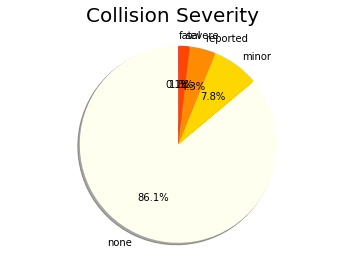

In [291]:
pie_chart(chi)

In [316]:
# df is dataframe with all collisions. month is numerical rep. of month, ie: jan = '01'
def collisions_by_month(df, month):
    month_total = df[df['CRASH_MONTH'] == month]
    return month_total['CRASH_DAY_OF_WEEK'].value_counts().sort_index()

In [317]:
monthly_collisions = np.array([collisions_by_month(chi, x) for x in range(1,13)])
monthly_collisions

array([[1767, 2625, 3149, 2849, 2923, 2705, 2588],
       [2075, 2590, 2570, 2382, 2548, 2696, 2433],
       [2357, 2353, 2515, 2421, 2690, 3506, 3145],
       [2403, 3311, 2733, 2568, 2648, 2829, 2517],
       [2300, 2535, 3176, 3450, 3590, 3510, 2760],
       [2821, 2771, 2764, 2807, 2790, 3631, 3616],
       [2577, 3428, 3424, 3049, 2645, 3008, 2746],
       [2247, 2617, 2515, 2799, 3187, 3585, 3089],
       [2398, 2301, 2697, 2507, 2693, 3179, 3161],
       [2428, 3130, 3454, 3103, 2522, 3039, 2667],
       [2200, 2532, 2615, 2822, 2964, 3240, 2542],
       [2935, 2729, 2431, 2495, 2676, 3300, 3510]])

In [318]:
columns = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
rows = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

In [319]:
heat_map = pd.DataFrame(data=monthly_collisions, index = rows, columns = columns)

In [451]:
fig = plt.figure(figsize=(12,12))
map1 = sns.heatmap(heat_map, annot=True, fmt='d', cmap="YlGnBu",cbar_kws={"orientation": "horizontal"})
map1.set_title("Collisions by day of week for each month in Chicago, Sept 2017 - 2019")
# fig.savefig("daily_by_month_chi.png")

TypeError: 'Figure' object is not callable

In [321]:
# timestart and timeend are int64s in 24 hour time. 12am => 0000 - 0100
def collisions_by_time(df, timestart, timeend):
    in_range = df[(df['TIME'] >= timestart) & (df['TIME'] < timeend)]
    return in_range['CRASH_DAY_OF_WEEK'].value_counts().sort_index()

In [322]:
# index in list corresponds to hour, each item in list is a Series with number of crashes in that respective hour for each day of the week
hourly_collisions = np.array([collisions_by_time(chi, x, x+100) for x in range(0, 2400, 100)])
hourly_collisions

array([[1256,  533,  410,  404,  458,  500, 1014],
       [1147,  484,  294,  309,  294,  451,  940],
       [1024,  413,  255,  260,  268,  348,  926],
       [1034,  280,  199,  188,  229,  265,  705],
       [ 786,  333,  238,  212,  236,  323,  592],
       [ 686,  495,  451,  424,  446,  465,  456],
       [ 565,  944,  931,  944,  863,  825,  559],
       [ 497, 2041, 2075, 2083, 1964, 1734,  708],
       [ 613, 2377, 2685, 2460, 2423, 2208,  987],
       [ 959, 1824, 1916, 1880, 1893, 1780, 1380],
       [1214, 1536, 1650, 1579, 1549, 1707, 1735],
       [1450, 1608, 1742, 1611, 1713, 1860, 1894],
       [1716, 1907, 1944, 1821, 1931, 2203, 2318],
       [1831, 1874, 1921, 1943, 1903, 2292, 2273],
       [1921, 2167, 2116, 2163, 2030, 2602, 2361],
       [1855, 2627, 2665, 2584, 2645, 2971, 2306],
       [1771, 2608, 2744, 2695, 2766, 3097, 2190],
       [1640, 2511, 2896, 2704, 2794, 2991, 2107],
       [1491, 1976, 2213, 2094, 2209, 2465, 1941],
       [1315, 1315, 1421, 1437,

In [323]:
#Create matrix for the heatmap
columns = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
rows = ["12am", "1am", "2am", "3am", "4am", "5am", "6am", "7am", "8am", "9am", "10am", "11am", "12pm", "1pm", "2pm", "3pm","4pm","5pm","6pm","7pm","8pm","9pm","10pm","11pm"]
hourly_heatmap = pd.DataFrame(data = hourly_collisions, index = rows, columns = columns)

Text(0.5, 1.0, 'Hourly collisions by day of week in Chicago, Sept 2017 - present')

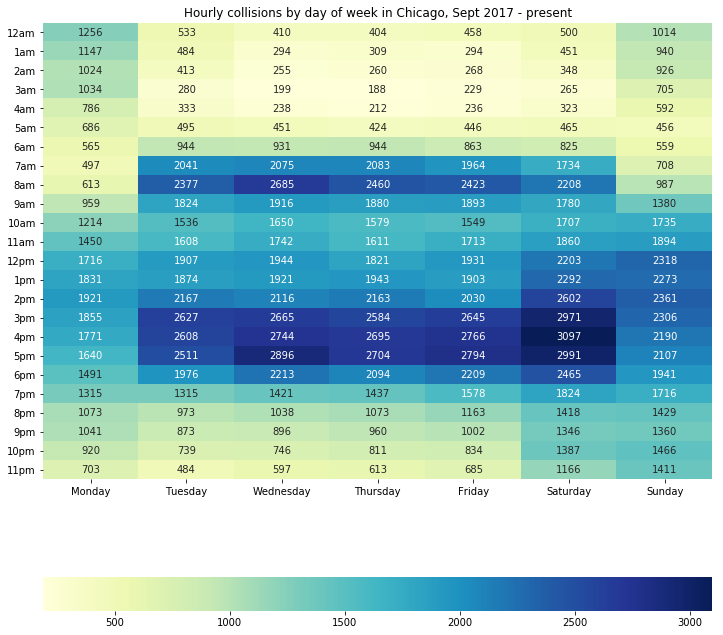

In [324]:
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(hourly_heatmap, annot=True, fmt='d', cmap="YlGnBu", cbar_kws={"orientation": "horizontal"})
ax.set_title("Hourly collisions by day of week in Chicago, Sept 2017 - present")
# fig.savefig("hourly_collisions_chi.png")

In [456]:
weather = pd.read_csv('daily_weather_train_chi.csv')
weather = weather.fillna(value={'Snowfall': 0, 'Snow/Ice Depth': 0})
weather.head()

,Site4,Date,Source,Max Temp,Min Temp,Avg Temp,HDDs,CDDs,Precipitation Water Equiv,Snowfall,Snow/Ice Depth
0,KMDW,9/1/2017 0:00:00,NCDC,69,58,63.5,1.5,0.0,0.0000,0.0,0.0
1,KMDW,9/2/2017 0:00:00,NCDC,74,50,62.0,3.0,0.0,0.2600,0.0,0.0
2,KMDW,9/3/2017 0:00:00,NCDC,84,57,70.5,0.0,5.5,0.0000,0.0,0.0
3,KMDW,9/4/2017 0:00:00,NCDC,84,65,74.5,0.0,9.5,0.0001,0.0,0.0
4,KMDW,9/5/2017 0:00:00,NCDC,72,55,63.5,1.5,0.0,0.0000,0.0,0.0


In [457]:
weather['Rain'] = np.where(((weather['Precipitation Water Equiv']>=0.05) & (weather['Snowfall'] == 0.0)), 1, 0)
weather[['Date','Time']] = weather['Date'].str.split(expand=True)
weather = weather.drop('Time', axis=1)

In [458]:
snow_filter = ((weather['Snowfall'] != 0.0) | (weather['Snow/Ice Depth'] != 0.0))
snowy_days = weather[snow_filter]
not_snowy_days = weather[~snow_filter]

In [459]:
rain_filter = (weather['Rain'] == 1)
rainy_days = weather[rain_filter]
not_rainy_days = weather[~rain_filter]

In [460]:
chi.head()
weather.head()

,Site4,Date,Source,Max Temp,Min Temp,Avg Temp,HDDs,CDDs,Precipitation Water Equiv,Snowfall,Snow/Ice Depth,Rain
0,KMDW,9/1/2017,NCDC,69,58,63.5,1.5,0.0,0.0000,0.0,0.0,0
1,KMDW,9/2/2017,NCDC,74,50,62.0,3.0,0.0,0.2600,0.0,0.0,1
2,KMDW,9/3/2017,NCDC,84,57,70.5,0.0,5.5,0.0000,0.0,0.0,0
3,KMDW,9/4/2017,NCDC,84,65,74.5,0.0,9.5,0.0001,0.0,0.0,0
4,KMDW,9/5/2017,NCDC,72,55,63.5,1.5,0.0,0.0000,0.0,0.0,0


In [461]:
def count_accidents(df,day):
    date = day.split('/')
    
    d = ('0' + date[1]) if (len(date[1]) == 1) else date[1]
    m = ('0' + date[0]) if (len(date[0]) == 1) else date[0]
    y = date[2]
 
    new_day = m + '/' + d + '/' + y
    
    matches = df[df['DATE'] == new_day]
    return matches.shape[0]

In [462]:
rainy_days['Accidents'] = rainy_days.apply(lambda x: count_accidents(chi, x['Date']), axis=1)
snowy_days['Accidents'] = snowy_days.apply(lambda x: count_accidents(chi, x['Date']), axis=1)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [463]:
not_rainy_days['Accidents'] = not_rainy_days.apply(lambda x: count_accidents(chi, x['Date']), axis=1)
not_snowy_days['Accidents'] = not_snowy_days.apply(lambda x: count_accidents(chi, x['Date']), axis=1)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [464]:
cr_normal = not_rainy_days.Accidents.mean()
cr_snow = snowy_days.Accidents.mean()
cr_rain = snowy_days.Accidents.mean()

In [465]:
snowy_days['weather'] = 'snow'
rainy_days['weather'] = 'rain'
not_rainy_days['weather'] = 'clear'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [466]:
tot = not_rainy_days.append(rainy_days).append(snowy_days)

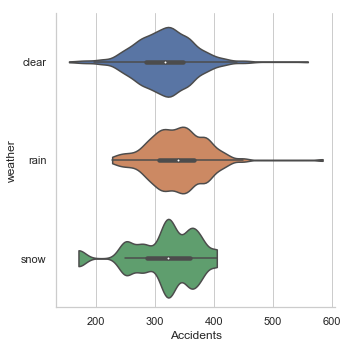

In [467]:
# sns.set(style='whitegrid')
sns.catplot(x="Accidents", y = "weather", kind='violin', data=tot,bw=.2, cut=0)

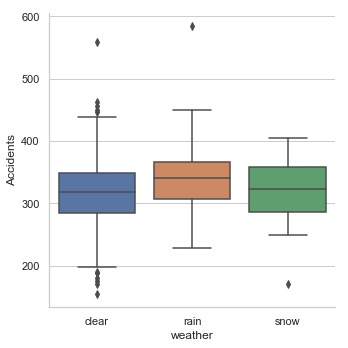

In [468]:
sns.catplot(x="weather", y = "Accidents", kind='box', data=tot)

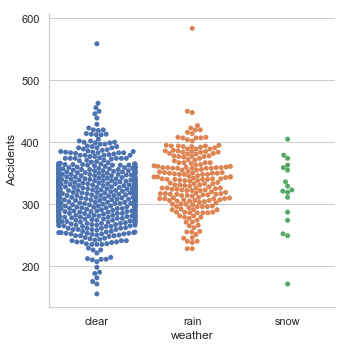

In [469]:
sns.catplot(x="weather", y = "Accidents", kind='swarm', data=tot)

In [470]:
chi.PRIM_CONTRIBUTORY_CAUSE.value_counts().sort_values(ascending=False)

UNABLE TO DETERMINE                                                                 82369
FAILING TO YIELD RIGHT-OF-WAY                                                       27494
FOLLOWING TOO CLOSELY                                                               25211
NOT APPLICABLE                                                                      12811
IMPROPER OVERTAKING/PASSING                                                         11243
IMPROPER BACKING                                                                    10388
FAILING TO REDUCE SPEED TO AVOID CRASH                                              10302
IMPROPER LANE USAGE                                                                  9541
IMPROPER TURNING/NO SIGNAL                                                           8231
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  7260
DISREGARDING TRAFFIC SIGNALS                                                         4332
WEATHER   

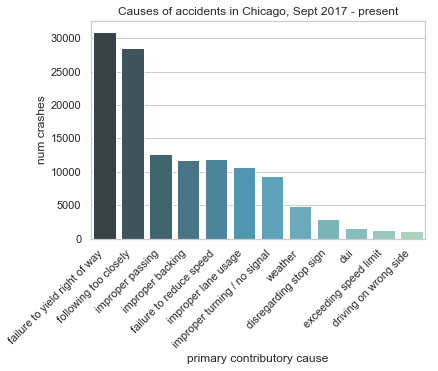

In [476]:
order = ["FAILING TO YIELD RIGHT-OF-WAY", "FOLLOWING TOO CLOSELY", "IMPROPER OVERTAKING/PASSING", "IMPROPER BACKING", "FAILING TO REDUCE SPEED TO AVOID CRASH", "IMPROPER LANE USAGE", "IMPROPER TURNING/NO SIGNAL", "WEATHER","DISREGARDING STOP SIGN", "UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)", "EXCEEDING AUTHORIZED SPEED LIMIT", "DRIVING ON WRONG SIDE/WRONG WAY"]
plt = sns.countplot(x=chi_raw.PRIM_CONTRIBUTORY_CAUSE, order=order, palette="GnBu_d")
plt.set_title("Causes of accidents in Chicago, Sept 2017 - present")
plt.set(xlabel="primary contributory cause", ylabel="num crashes")
plt.set_xticklabels(rotation=45, labels = ["failure to yield right of way", "following too closely", "improper passing", "improper backing", "failure to reduce speed", "improper lane usage", "improper turning / no signal", "weather", "disregarding stop sign", "dui", "exceeding speed limit", "driving on wrong side"],horizontalalignment='right')
fig = plt.get_figure()
fig.savefig("causes_of_accidents_chi.png")